In [3]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.tes

--2023-04-19 18:15:11--  https://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.tes
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 234366 (229K) [application/x-httpd-php]
Saving to: ‘pendigits.tes’

pendigits.tes       100%[===================>] 228.87K   426KB/s    in 0.5s    

2023-04-19 18:15:12 (426 KB/s) - ‘pendigits.tes’ saved [234366/234366]



In [4]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.tra

--2023-04-19 18:15:12--  https://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.tra
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 502098 (490K) [application/x-httpd-php]
Saving to: ‘pendigits.tra’

pendigits.tra       100%[===================>] 490.33K   739KB/s    in 0.7s    

2023-04-19 18:15:13 (739 KB/s) - ‘pendigits.tra’ saved [502098/502098]



In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('/content/pendigits.tra')
df.head()

,47,100,27,81,57,37,26,0,0.1,23,56,53,100.1,90,40,98,8
0,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
1,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
2,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
3,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1
4,100,100,88,99,49,74,17,47,0,16,37,0,73,16,20,20,6


In [7]:
df.columns = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','Target']
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,Target
0,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
1,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
2,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
3,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1
4,100,100,88,99,49,74,17,47,0,16,37,0,73,16,20,20,6


In [8]:
df.iloc[:,:-1]=df.iloc[:,:-1]/100
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,Target
0,0.0,0.89,0.27,1.00,0.42,0.75,0.29,0.45,0.15,0.15,0.37,0.00,0.69,0.02,1.00,0.06,2
1,0.0,0.57,0.31,0.68,0.72,0.90,1.00,1.00,0.76,0.75,0.50,0.51,0.28,0.25,0.16,0.00,1
2,0.0,1.00,0.07,0.92,0.05,0.68,0.19,0.45,0.86,0.34,1.00,0.45,0.74,0.23,0.67,0.00,4
3,0.0,0.67,0.49,0.83,1.00,1.00,0.81,0.80,0.60,0.60,0.40,0.40,0.33,0.20,0.47,0.00,1
4,1.0,1.00,0.88,0.99,0.49,0.74,0.17,0.47,0.00,0.16,0.37,0.00,0.73,0.16,0.20,0.20,6


In [9]:
from sklearn.model_selection import ShuffleSplit

skf = ShuffleSplit(n_splits = 3, test_size = 0.3)

# xtrain,xtest,ytrain,ytest = train_test_split(df.iloc[:,:-1],df.Target,test_size = 0.3)

In [ ]:
print(np.shape(xtrain))
print(np.shape(xtest))
print(np.shape(ytrain))
print(np.shape(ytest))

(5245, 16)
(2248, 16)
(5245,)
(2248,)


In [12]:
from tqdm import tqdm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score as acc
X = df.iloc[:,:-1]
Y = df.Target

df_final = pd.DataFrame(columns = ['C','gamma','kernel','accuracy'])
df_final.head()

,C,gamma,kernel,accuracy


In [18]:
for C in tqdm([0.1, 1, 10,]):
    for g in [1, 0.1, 0.01,]:
        for kernel in ['linear','poly','sigmoid']:
            ac = []
            for train,test in skf.split(X,Y):
                xtrain, xtest = X.iloc[train,:], X.iloc[test,:]
                ytrain, ytest = Y[train], Y[test]
                s = SVC(C=C,kernel = kernel, gamma = g)
                s.fit(xtrain, ytrain)
                ac.append(acc(ytest,s.predict(xtest)))
            df_final.loc[len(df_final)] = [C,g,kernel,np.mean(ac)]

100%|██████████| 3/3 [02:11<00:00, 43.99s/it]


In [19]:
df_final

,C,gamma,kernel,accuracy
0,0.1,1.00,linear,0.952402
1,0.1,1.00,poly,0.995996
2,0.1,1.00,linear,0.954330
3,0.1,1.00,poly,0.994514
4,0.1,1.00,sigmoid,0.131673
5,0.1,0.10,linear,0.951661
6,0.1,0.10,poly,0.876928
7,0.1,0.10,sigmoid,0.854982
8,0.1,0.01,linear,0.958185
9,0.1,0.01,poly,0.097865


In [21]:
df_final[df_final['accuracy'] == np.max(df_final.accuracy)]

,C,gamma,kernel,accuracy
1,0.1,1.0,poly,0.995996


In [27]:
df_plot = pd.DataFrame(columns = ['iterations','accuracy'])
for i in tqdm(range(1,1001,25)):
    ac = []
    for train,test in skf.split(X,Y):
        xtrain, xtest = X.iloc[train,:], X.iloc[test,:]
        ytrain, ytest = Y[train], Y[test]
        s = SVC(C=C,kernel = kernel, gamma = g)
        s.fit(xtrain, ytrain)
        ac.append(acc(ytest,s.predict(xtest)))
    df_plot.loc[len(df_plot)] = [i, np.mean(ac)]
df_plot.head()

100%|██████████| 40/40 [01:53<00:00,  2.84s/it]


,iterations,accuracy
0,1.0,0.951512
1,26.0,0.946026
2,51.0,0.957147
3,76.0,0.955368
4,101.0,0.951068


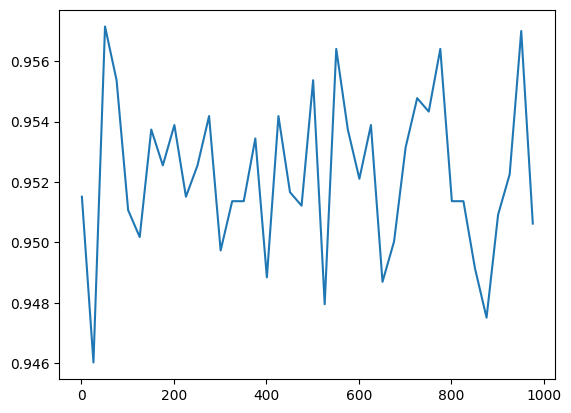

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df_plot.iterations, df_plot.accuracy)